<a href="https://colab.research.google.com/github/fawniechau/Homelessness/blob/main/chau_homelessness_data_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

The main purpose of this notebook is to ready the dataset for analysis, with the aim of examining the connections between housing market variables and the issue of homelessness in King County, Washington.

The 2020 [point-in-time count](https://www.kingcounty.gov/elected/executive/constantine/news/release/2020/July/01-homeless-count.aspx) of people experiencing homelessness for Seattle/King County was 11,751. This represents a 5% increase over the 2019 count and reflects similar trend across many counties in the western U.S.. A step towards addressing homelessness is improving our understanding of the relationship between local housing market factors and homelessness. 

The U.S. Department of Housing and Urban Development (HUD) produced a report in 2019 [Market Predictors of Homelessness](https://www.huduser.gov/portal/sites/default/files/pdf/Market-Predictors-of-Homelessness.pdf) that describes a model-based approach to understanding of the relationship between local housing market factors and homelessness. Our project is motivated by the goals of the HUD study:

"To continue progressing toward the goals of ending and preventing homelessness, we must further our knowledge of the basic community-level determinants of homelessness. The primary objectives of this study are to (1) identify market factors that have established effects on homelessness, (2) construct and evaluate empirical models of community-level homelessness.."

We will investigate whether there are alternative modeling approaches that outperform the models described in the HUD report.


## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

# Train-test splits
from sklearn.model_selection import train_test_split

# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

## The Data

The [data](https://github.com/brian-fischer/DATA-3320/blob/main/homelessness/05b_analysis_file_update.csv) for this project are described in U.S. Department of Housing and Urban Development's (HUD) report [Market Predictors of Homelessness](https://www.huduser.gov/portal/sites/default/files/pdf/Market-Predictors-of-Homelessness.pdf) in the section titled DATA.


The data dictionary [HUD TO3 - 05b Analysis File - Data Dictionary.csv](https://github.com/brian-fischer/DATA-3320/blob/main/homelessness/HUD%20TO3%20-%2005b%20Analysis%20File%20-%20Data%20-%20Dictionary.csv) contains descriptions of all variables in the data set.




## Load the data

In [2]:
# HUD data 
df = pd.read_csv('https://raw.githubusercontent.com/fawniechau/Homelessness/main/05b_analysis_file_update.csv')

In [3]:
# data dictionary 
df_dict = pd.read_csv('https://raw.githubusercontent.com/fawniechau/Homelessness/main/HUD%20TO3%20-%2005b%20Analysis%20File%20-%20Data%20-%20Dictionary.csv')

## Explore the contents of the data set

In [4]:
df.head()

,year,cocnumber,pit_tot_shelt_pit_hud,pit_tot_unshelt_pit_hud,pit_tot_hless_pit_hud,pit_ind_shelt_pit_hud,pit_ind_unshelt_pit_hud,pit_ind_hless_pit_hud,pit_perfam_shelt_pit_hud,pit_perfam_unshelt_pit_hud,...,sub_high_cost_rent75,sub_high_cost_homeval75,sub_high_rent_share75,tight_high_cost_rental_mkt,sub_tight_high_cost_rent,sub_west_coast_all_urb,sub_west_census,major_city,suburban,rural
0,2010,AK-500,1113.0,118.0,1231.0,633.0,107.0,740.0,480.0,11.0,...,1,1,1,3,1,1,1,1,0,0
1,2011,AK-500,1082.0,141.0,1223.0,677.0,117.0,794.0,405.0,24.0,...,1,1,0,3,1,1,1,1,0,0
2,2012,AK-500,1097.0,50.0,1147.0,756.0,35.0,791.0,341.0,15.0,...,1,1,1,3,1,1,1,1,0,0
3,2013,AK-500,1070.0,52.0,1122.0,792.0,52.0,844.0,278.0,0.0,...,1,1,0,3,1,1,1,1,0,0
4,2014,AK-500,970.0,53.0,1023.0,688.0,48.0,736.0,282.0,5.0,...,1,1,1,3,1,1,1,1,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Columns: 332 entries, year to rural
dtypes: float64(257), int64(73), object(2)
memory usage: 7.6+ MB


We see that there are many columns in the data frame (332!), so it will not be easy to make sense of the data set without the data dictionary.


In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 332 columns):
 #    Column                            Dtype  
---   ------                            -----  
 0    year                              int64  
 1    cocnumber                         object 
 2    pit_tot_shelt_pit_hud             float64
 3    pit_tot_unshelt_pit_hud           float64
 4    pit_tot_hless_pit_hud             float64
 5    pit_ind_shelt_pit_hud             float64
 6    pit_ind_unshelt_pit_hud           float64
 7    pit_ind_hless_pit_hud             float64
 8    pit_perfam_shelt_pit_hud          float64
 9    pit_perfam_unshelt_pit_hud        float64
 10   pit_perfam_hless_pit_hud          float64
 11   pit_ind_chronic_hless_pit_hud     float64
 12   pit_perfam_chronic_hless_pit_hud  float64
 13   pit_vet_hless_pit_hud             float64
 14   econ_urb_urbanicity               int64  
 15   coctag                            int64  
 16   panelvar              

This dataframe has about 3000 entries and 302 columns, which is very large. 

In [7]:
df_dict

,Associated Domain,Variable,Variable Label,Derived,Source or Root Variable,Table Name(s)
0,Identifier,year,year,No,NaN,NaN
1,Identifier,cocnumber,continuum of care number,No,HUD,NaN
2,Outcome,pit_tot_shelt_pit_hud,total sheltered - HUD PIT,No,HUD PIT,NaN
3,Outcome,pit_tot_unshelt_pit_hud,total unsheltered - HUD PIT,No,HUD PIT,NaN
4,Outcome,pit_tot_hless_pit_hud,total homeless - HUD PIT,No,HUD PIT,NaN
...,...,...,...,...,...,...
327,Subgroup,sub_west_coast_all_urb,indicator for suburban or major city/largely u...,No,NaN,NaN
328,Subgroup,sub_west_census,indicator for west region CoCs,No,NaN,NaN
329,Subgroup,major_city,indicator for major city or largely urban CoC,No,HUD,NaN
330,Subgroup,suburban,indicator for largely suburban CoC,No,HUD,NaN


In [8]:
df_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Associated Domain        332 non-null    object
 1   Variable                 332 non-null    object
 2   Variable Label           332 non-null    object
 3   Derived                  332 non-null    object
 4   Source or Root Variable  307 non-null    object
 5   Table Name(s)            105 non-null    object
dtypes: object(6)
memory usage: 15.7+ KB


Not as big as the HUD dataset. 

### Explore the data sources

Use the dictionary to find the unique `Associated Domain` values.

In [9]:
df_dict['Associated Domain'].unique()

array(['Identifier', 'Outcome', 'Secondary Outcome', 'Subgroup',
       'Safety Net', 'Demographic', 'Housing', 'Economic', 'Local Policy',
       'Climate', 'Geography'], dtype=object)

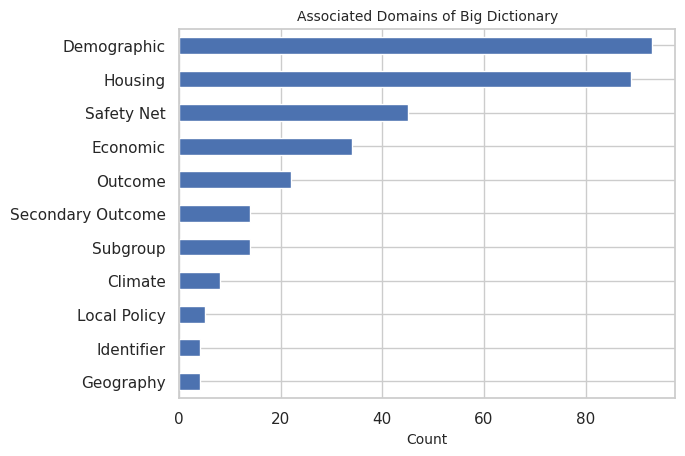

In [10]:
# creating a bar graph
df_dict['Associated Domain'].value_counts().plot(kind='barh')
plt.gca().invert_yaxis()

plt.xlabel('Count', fontsize=10)
plt.title('Associated Domains of Big Dictionary', fontsize=10);

The two highest variables of the dictionary dataset are demographic, housing, followed by safety net. 

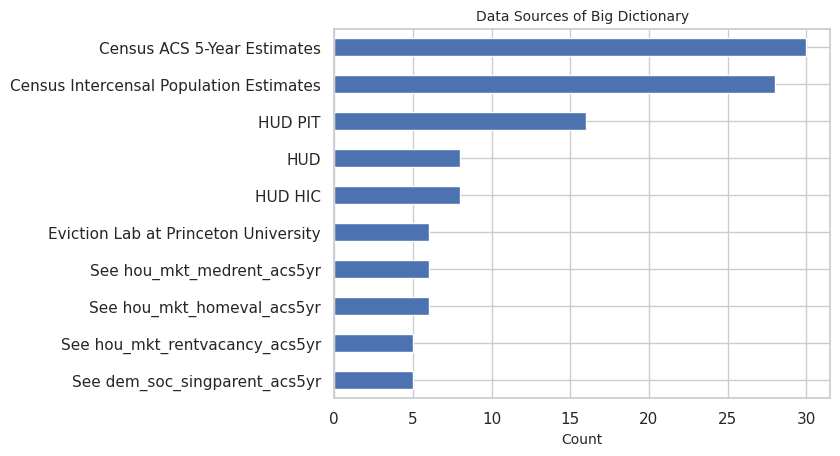

In [11]:
# creating a bar graph
df_dict['Source or Root Variable'].value_counts().head(10).plot(kind='barh')
plt.gca().invert_yaxis()

plt.xlabel('Count', fontsize=10)
plt.title('Data Sources of Big Dictionary', fontsize=10);

The majority of the data utilized in this study was sourced from "Census ACS 5-Year Estimates" and "Census Intercensal Population Estimates."

## Select relevant subsets of the data

We will explore a subset of the full data set. We will keep the following columns:

In [12]:
columns_to_keep = ["year", "cocnumber",
  
                  "pit_tot_hless_pit_hud", "pit_tot_shelt_pit_hud", "pit_tot_unshelt_pit_hud","dem_pop_pop_census",
  
                  "fhfa_hpi_2009", "ln_hou_mkt_medrent_xt", "hou_mkt_utility_xt", "hou_mkt_burden_own_acs5yr_2017", "hou_mkt_burden_sev_rent_acs_2017", "hou_mkt_rentshare_acs5yr_2017", "hou_mkt_rentvacancy_xt", "hou_mkt_density_dummy", "hou_mkt_evict_count", "hou_mkt_ovrcrowd_acs5yr_2017", "major_city", "suburban",
           
                  "econ_labor_unemp_rate_BLS", "econ_labor_incineq_acs5yr_2017", "econ_labor_pov_pop_census_share",
           
                  "hou_pol_hudunit_psh_hud_share", "hou_pol_occhudunit_psh_hud", "hou_mkt_homeage1940_xt",
           
                  "dem_soc_black_census", "dem_soc_hispanic_census", "dem_soc_asian_census", "dem_soc_pacific_census", "dem_pop_child_census", "dem_pop_senior_census", "dem_pop_female_census", "dem_pop_mig_census", "d_dem_pop_mig_census_share", "dem_soc_singadult_xt", "dem_soc_singparent_xt", "dem_soc_vet_xt", "dem_soc_ed_lessbach_xt", "dem_health_cost_dart", "dem_health_excesdrink_chr",
           
                  "env_wea_avgtemp_noaa", "env_wea_avgtemp_summer_noaa", "env_wea_precip_noaa", "env_wea_precip_annual_noaa"]
    

In [13]:
df = df[columns_to_keep]

In [14]:
df.head()

,year,cocnumber,pit_tot_hless_pit_hud,pit_tot_shelt_pit_hud,pit_tot_unshelt_pit_hud,dem_pop_pop_census,fhfa_hpi_2009,ln_hou_mkt_medrent_xt,hou_mkt_utility_xt,hou_mkt_burden_own_acs5yr_2017,...,dem_soc_singadult_xt,dem_soc_singparent_xt,dem_soc_vet_xt,dem_soc_ed_lessbach_xt,dem_health_cost_dart,dem_health_excesdrink_chr,env_wea_avgtemp_noaa,env_wea_avgtemp_summer_noaa,env_wea_precip_noaa,env_wea_precip_annual_noaa
0,2010,AK-500,1231.0,1113.0,118.0,285194,0.000000,NaN,NaN,15.334315,...,NaN,NaN,NaN,NaN,7.78885,NaN,18.400000,56.599998,0.68,12.560000
1,2011,AK-500,1223.0,1082.0,141.0,293370,0.009359,2.266958,9.3,15.334315,...,24.832815,21.77351,17.23423,66.952057,7.85001,NaN,18.799999,55.799999,0.52,15.560000
2,2012,AK-500,1147.0,1097.0,50.0,296291,-0.049137,NaN,NaN,15.334315,...,NaN,NaN,NaN,NaN,7.90594,NaN,2.900000,55.900002,1.17,16.459999
3,2013,AK-500,1122.0,1070.0,52.0,298520,-0.255042,2.266958,9.3,15.334315,...,24.832815,21.77351,17.23423,66.952057,7.83198,NaN,23.299999,56.000000,1.10,20.270000
4,2014,AK-500,1023.0,970.0,53.0,301081,3.170481,NaN,NaN,15.334315,...,NaN,NaN,NaN,NaN,7.95718,NaN,30.299999,60.099998,1.52,24.010000


Creating the dictionary for the subset of columns.

In [15]:
dictionary_small = df_dict[df_dict['Variable'].isin(columns_to_keep)]

In [26]:
dictionary_small

,Associated Domain,Variable,Variable Label,Derived,Source or Root Variable,Table Name(s)
0,Identifier,year,year,No,NaN,NaN
1,Identifier,cocnumber,continuum of care number,No,HUD,NaN
2,Outcome,pit_tot_shelt_pit_hud,total sheltered - HUD PIT,No,HUD PIT,NaN
3,Outcome,pit_tot_unshelt_pit_hud,total unsheltered - HUD PIT,No,HUD PIT,NaN
4,Outcome,pit_tot_hless_pit_hud,total homeless - HUD PIT,No,HUD PIT,NaN
32,Demographic,dem_pop_pop_census,"total population, intercensal estimate",No,Census Intercensal Population Estimates,"""Annual County Resident Population Estimates b..."
34,Demographic,dem_pop_female_census,"total female population, intercensal estimate",No,Census Intercensal Population Estimates,"""Annual County Resident Population Estimates b..."
35,Demographic,dem_pop_child_census,"total population ages 0-19, intercensal estimate",No,Census Intercensal Population Estimates,"""Annual County Resident Population Estimates b..."
37,Demographic,dem_pop_senior_census,"total population ages 65 or older, intercensal...",No,Census Intercensal Population Estimates,"""Annual County Resident Population Estimates b..."
39,Demographic,dem_soc_black_census,"total black alone (non-hispanic) population, i...",No,Census Intercensal Population Estimates,"""Annual County Resident Population Estimates b..."


Text(0.5, 0, '')

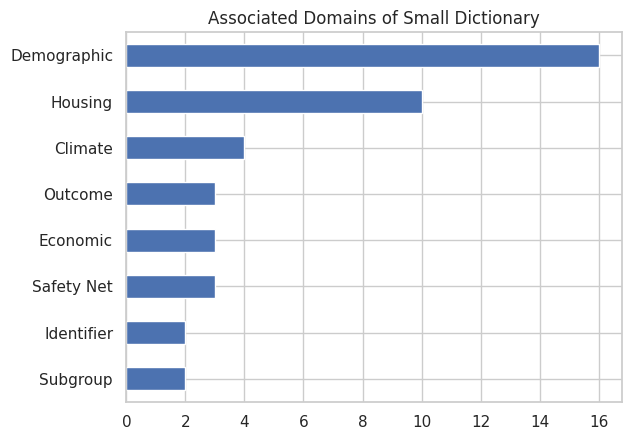

In [16]:
# plotting dictionary small 
dictionary_small['Associated Domain'].value_counts().head(10).plot(kind='barh')
plt.gca().invert_yaxis()

plt.title('Associated Domains of Small Dictionary')
plt.xlabel('')


Housing is significantly smaller than demographic. 

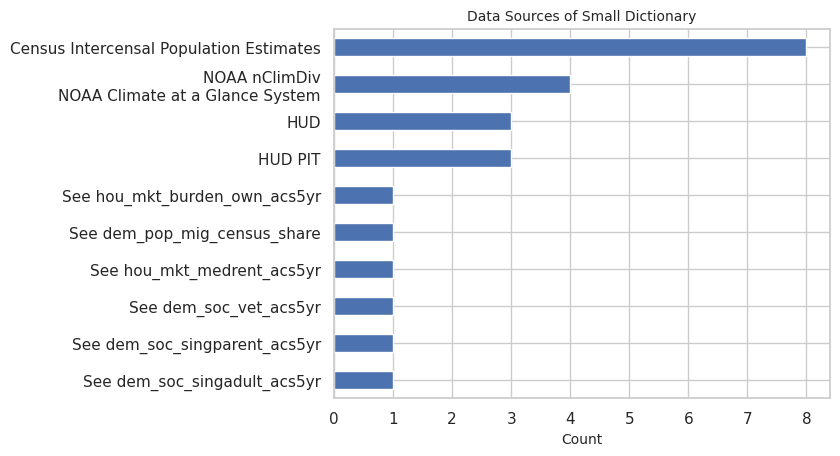

In [28]:
# plotting data source of small dictionary
dictionary_small['Source or Root Variable'].value_counts().head(10).plot(kind='barh')
plt.gca().invert_yaxis()

plt.xlabel('Count', fontsize=10)
plt.title('Data Sources of Small Dictionary', fontsize=10);

The highest count value is 8 from Census Intercensal Population Estimates, followed by NOAA and HUD. 

## Rename columns

In [23]:
df = df.rename(columns = {"cocnumber":"coc_number",
  
                          "pit_tot_hless_pit_hud":"total_homeless", 
                          "pit_tot_shelt_pit_hud":"total_sheltered", 
                          "pit_tot_unshelt_pit_hud":"total_unsheltered",
                          "dem_pop_pop_census":"total_population",
  
                          "fhfa_hpi_2009":"house_price_index_2009", 
                          "ln_hou_mkt_medrent_xt":"log_median_rent", 
                          "hou_mkt_utility_xt":"utility_costs", 
                          "hou_mkt_burden_own_acs5yr_2017":"percentage_owners_cost_burden_2016", 
                          "hou_mkt_burden_sev_rent_acs_2017":"percentage_renters_severe_cost_burden_2016", 
                          "hou_mkt_rentshare_acs5yr_2017":"share_renters_2016", 
                          "hou_mkt_rentvacancy_xt":"rental_vacancy_rate", 
                          "hou_mkt_density_dummy":"high_housing_density", 
                          "hou_mkt_evict_count":"number_eviction", 
                          "hou_mkt_ovrcrowd_acs5yr_2017":"share_overcrowded_units_2016", 
                          "major_city":"city_or_urban", 
           
                          "econ_labor_unemp_rate_BLS":"rate_unemployment", 
                          "econ_labor_incineq_acs5yr_2017":"gini_coefficient_2016", 
                          "econ_labor_pov_pop_census_share":"poverty_rate",
           
                          "hou_pol_hudunit_psh_hud_share":"share_HUD_units", 
                          "hou_pol_occhudunit_psh_hud":"HUD_unit_occupancy_rate", 
                          "hou_mkt_homeage1940_xt":"share_built_before_1940",
           
                          "dem_soc_black_census":"total_black", 
                          "dem_soc_hispanic_census":"total_latino_hispanic", 
                          "dem_soc_asian_census":"total_asian", 
                          "dem_soc_pacific_census":"total_pacific_islander", 
                          "dem_pop_child_census":"total_population_0_19", 
                          "dem_pop_senior_census":"total_population_65_plus", 
                          "dem_pop_female_census":"total_female_population", 
                          "dem_pop_mig_census":"net_migration", 
                          "d_dem_pop_mig_census_share":"migration_4_year_change", 
                          "dem_soc_singadult_xt":"proportion_one_person_households", 
                          "dem_soc_singparent_xt":"share_under_18_with_single_parent", 
                          "dem_soc_vet_xt":"share_veteran_status", 
                          "dem_soc_ed_lessbach_xt":"share_no_bachelors", 
                          "dem_health_cost_dart":"medicare_reimbursements_per_enrollee", 
                          "dem_health_excesdrink_chr":"percentage_excessive_drinking",
           
                          "env_wea_avgtemp_noaa":"average_Jan_temperature", 
                          "env_wea_avgtemp_summer_noaa":"average_summer_temperature", 
                          "env_wea_precip_noaa":"total_Jan_precipitation", 
                          "env_wea_precip_annual_noaa":"total_annual_precipitation"})

## Are the data suitable for answering the question?

We want to perform quick exploratory data analysis to determine whether the data are sufficient to answer our question. If the data are not sufficient, we do not want to waste time doing anything that will not be productive.

In [29]:
df.columns

Index(['year', 'coc_number', 'total_homeless', 'total_sheltered',
       'total_unsheltered', 'total_population', 'house_price_index_2009',
       'log_median_rent', 'utility_costs',
       'percentage_owners_cost_burden_2016',
       'percentage_renters_severe_cost_burden_2016', 'share_renters_2016',
       'rental_vacancy_rate', 'high_housing_density', 'number_eviction',
       'share_overcrowded_units_2016', 'city_or_urban', 'suburban',
       'rate_unemployment', 'gini_coefficient_2016', 'poverty_rate',
       'share_HUD_units', 'HUD_unit_occupancy_rate', 'share_built_before_1940',
       'total_black', 'total_latino_hispanic', 'total_asian',
       'total_pacific_islander', 'total_population_0_19',
       'total_population_65_plus', 'total_female_population', 'net_migration',
       'migration_4_year_change', 'proportion_one_person_households',
       'share_under_18_with_single_parent', 'share_veteran_status',
       'share_no_bachelors', 'medicare_reimbursements_per_enrollee',
 

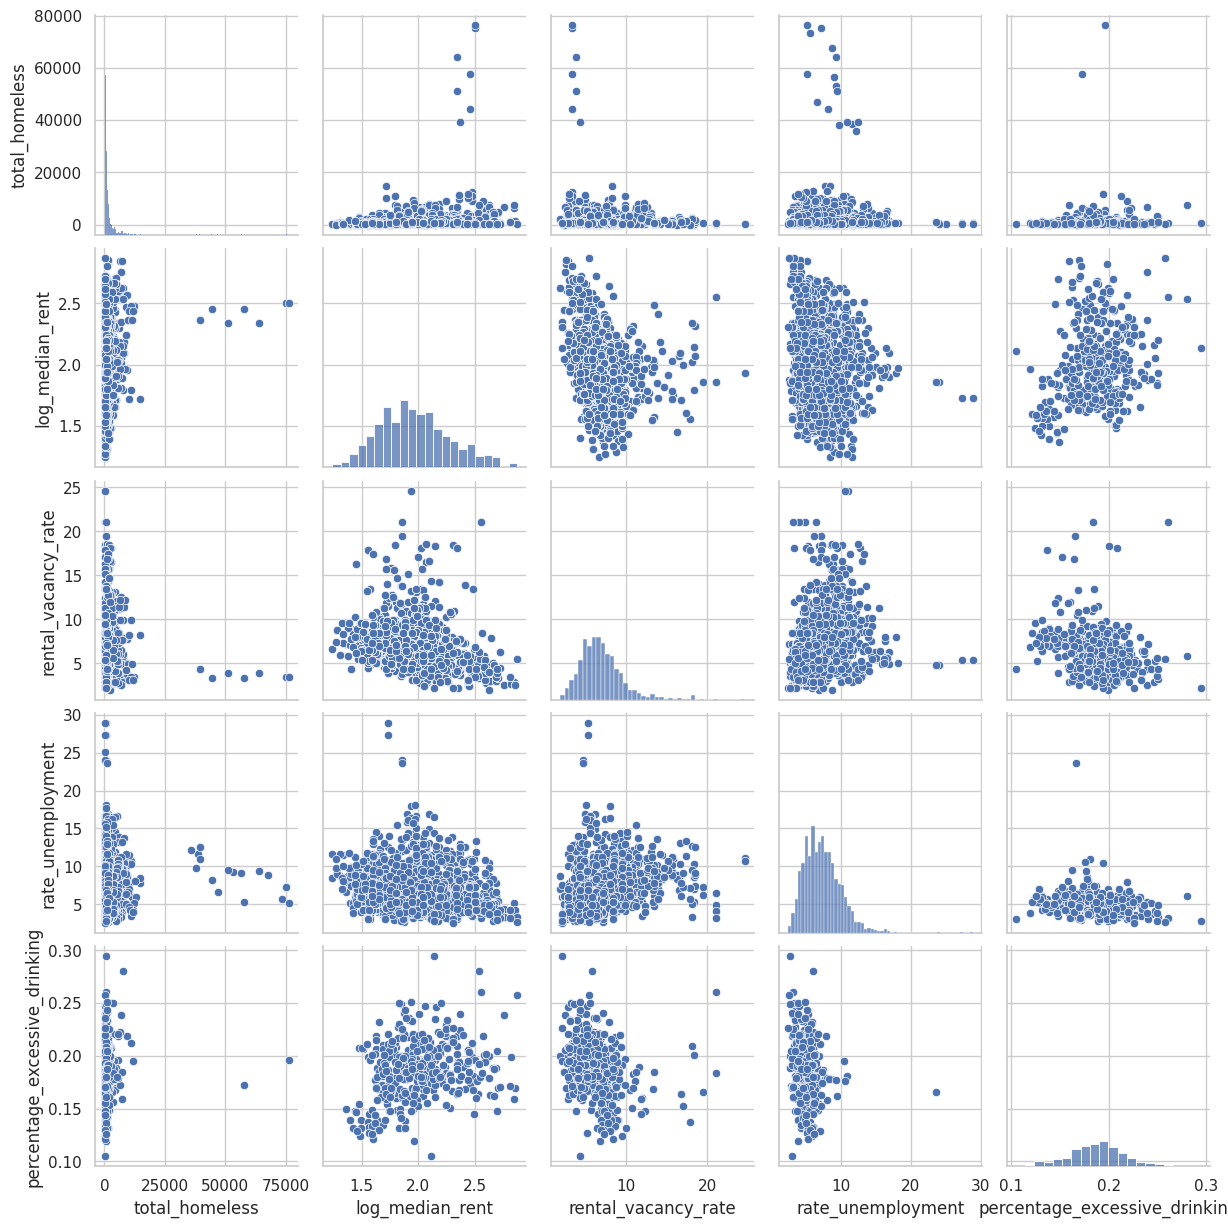

In [30]:
# pair plot for other variables vs. total_homeless
sns.pairplot(df[['total_homeless', 'log_median_rent', 'rental_vacancy_rate', 'rate_unemployment', 'percentage_excessive_drinking']])

Notice the number of outliers in each plot. This could be due to big cities with high homelessness rates compared to smaller cities. 

<ipython-input-31-742161715af1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.dropna().corr(), vmin=-1, vmax=1)


<Axes: >

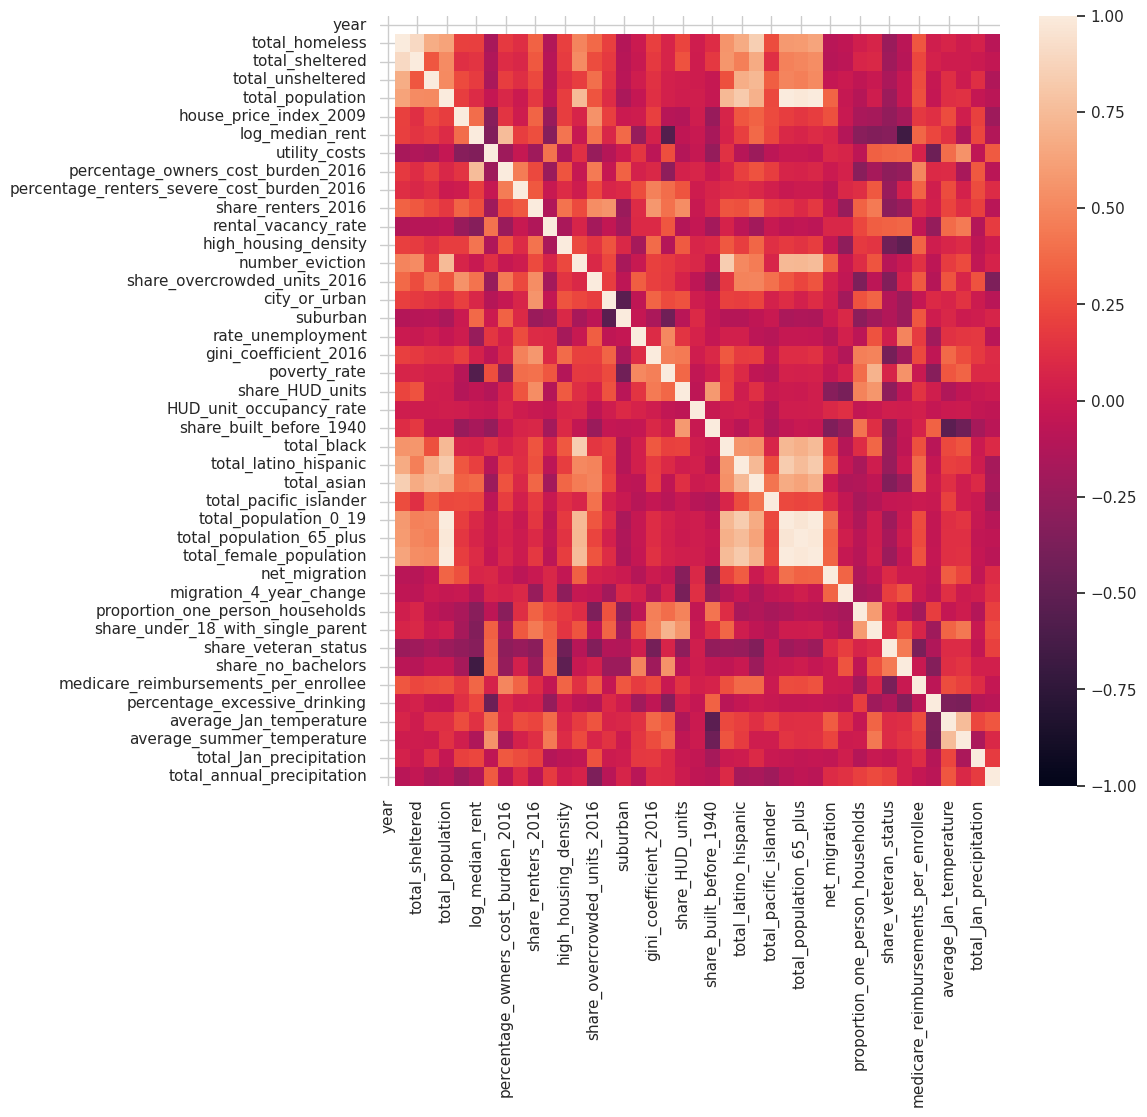

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(df.dropna().corr(), vmin=-1, vmax=1)


## Quality Control

**Checking** for out-of-range values or values that do not match what we want to analyze. Either setting values to `NaN` or remove the observations, as appropriate.

In [32]:
df.agg(['min','max']).T

,min,max
year,2010,2017
coc_number,AK-500,WY-500
total_homeless,7.0,76501.0
total_sheltered,3.0,72565.0
total_unsheltered,0.0,42828.0
total_population,29344,11058958
house_price_index_2009,-26.497087,63.864007
log_median_rent,1.239243,2.874838
utility_costs,5.6,22.6
percentage_owners_cost_burden_2016,8.072322,22.955448


There seems to be no values out of the ordinary. 

## Identify and deal with missing values

Let's check for missing values: 

<Axes: >

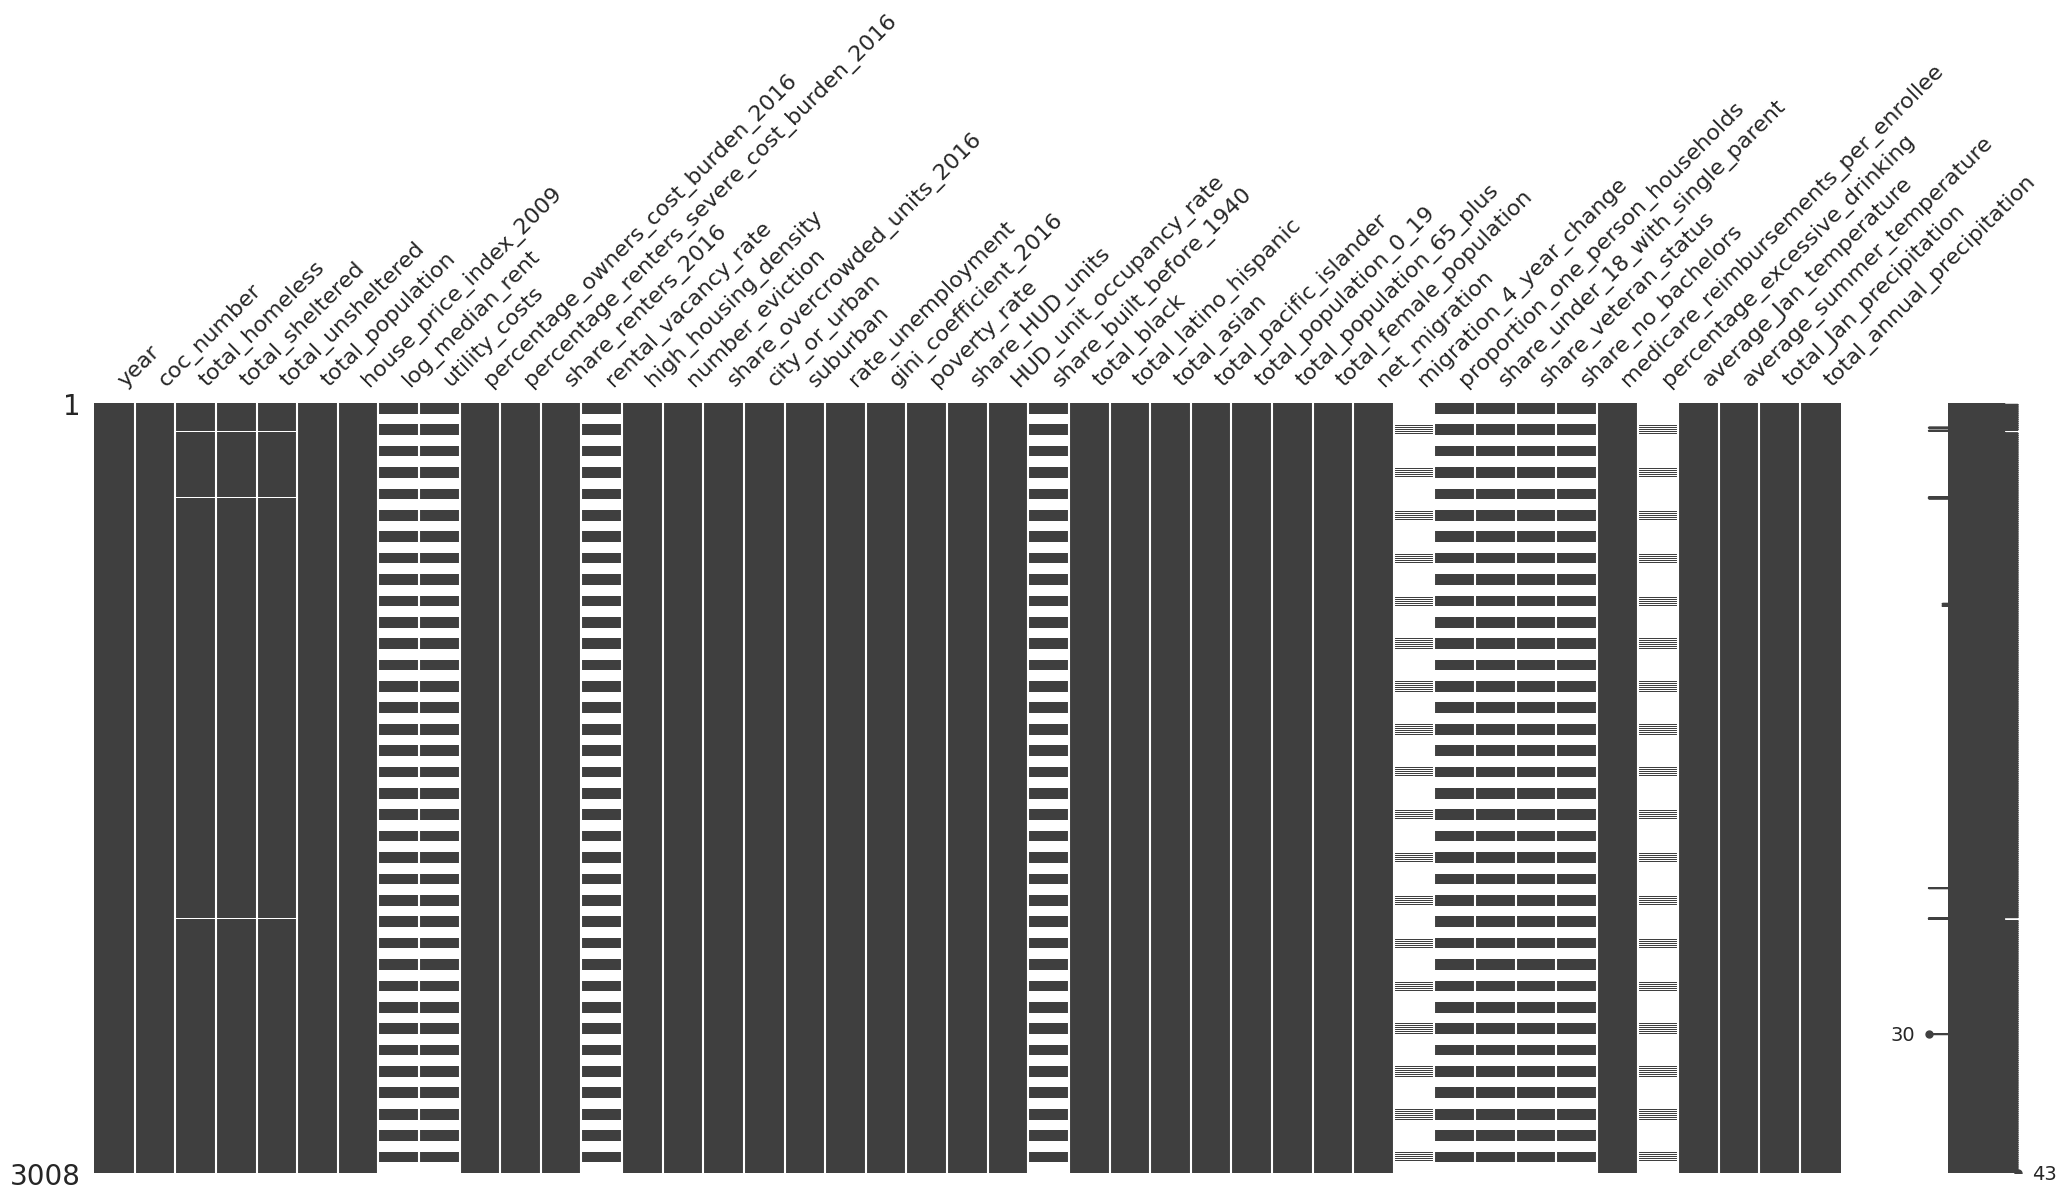

In [26]:
msno.matrix(df)

<Axes: >

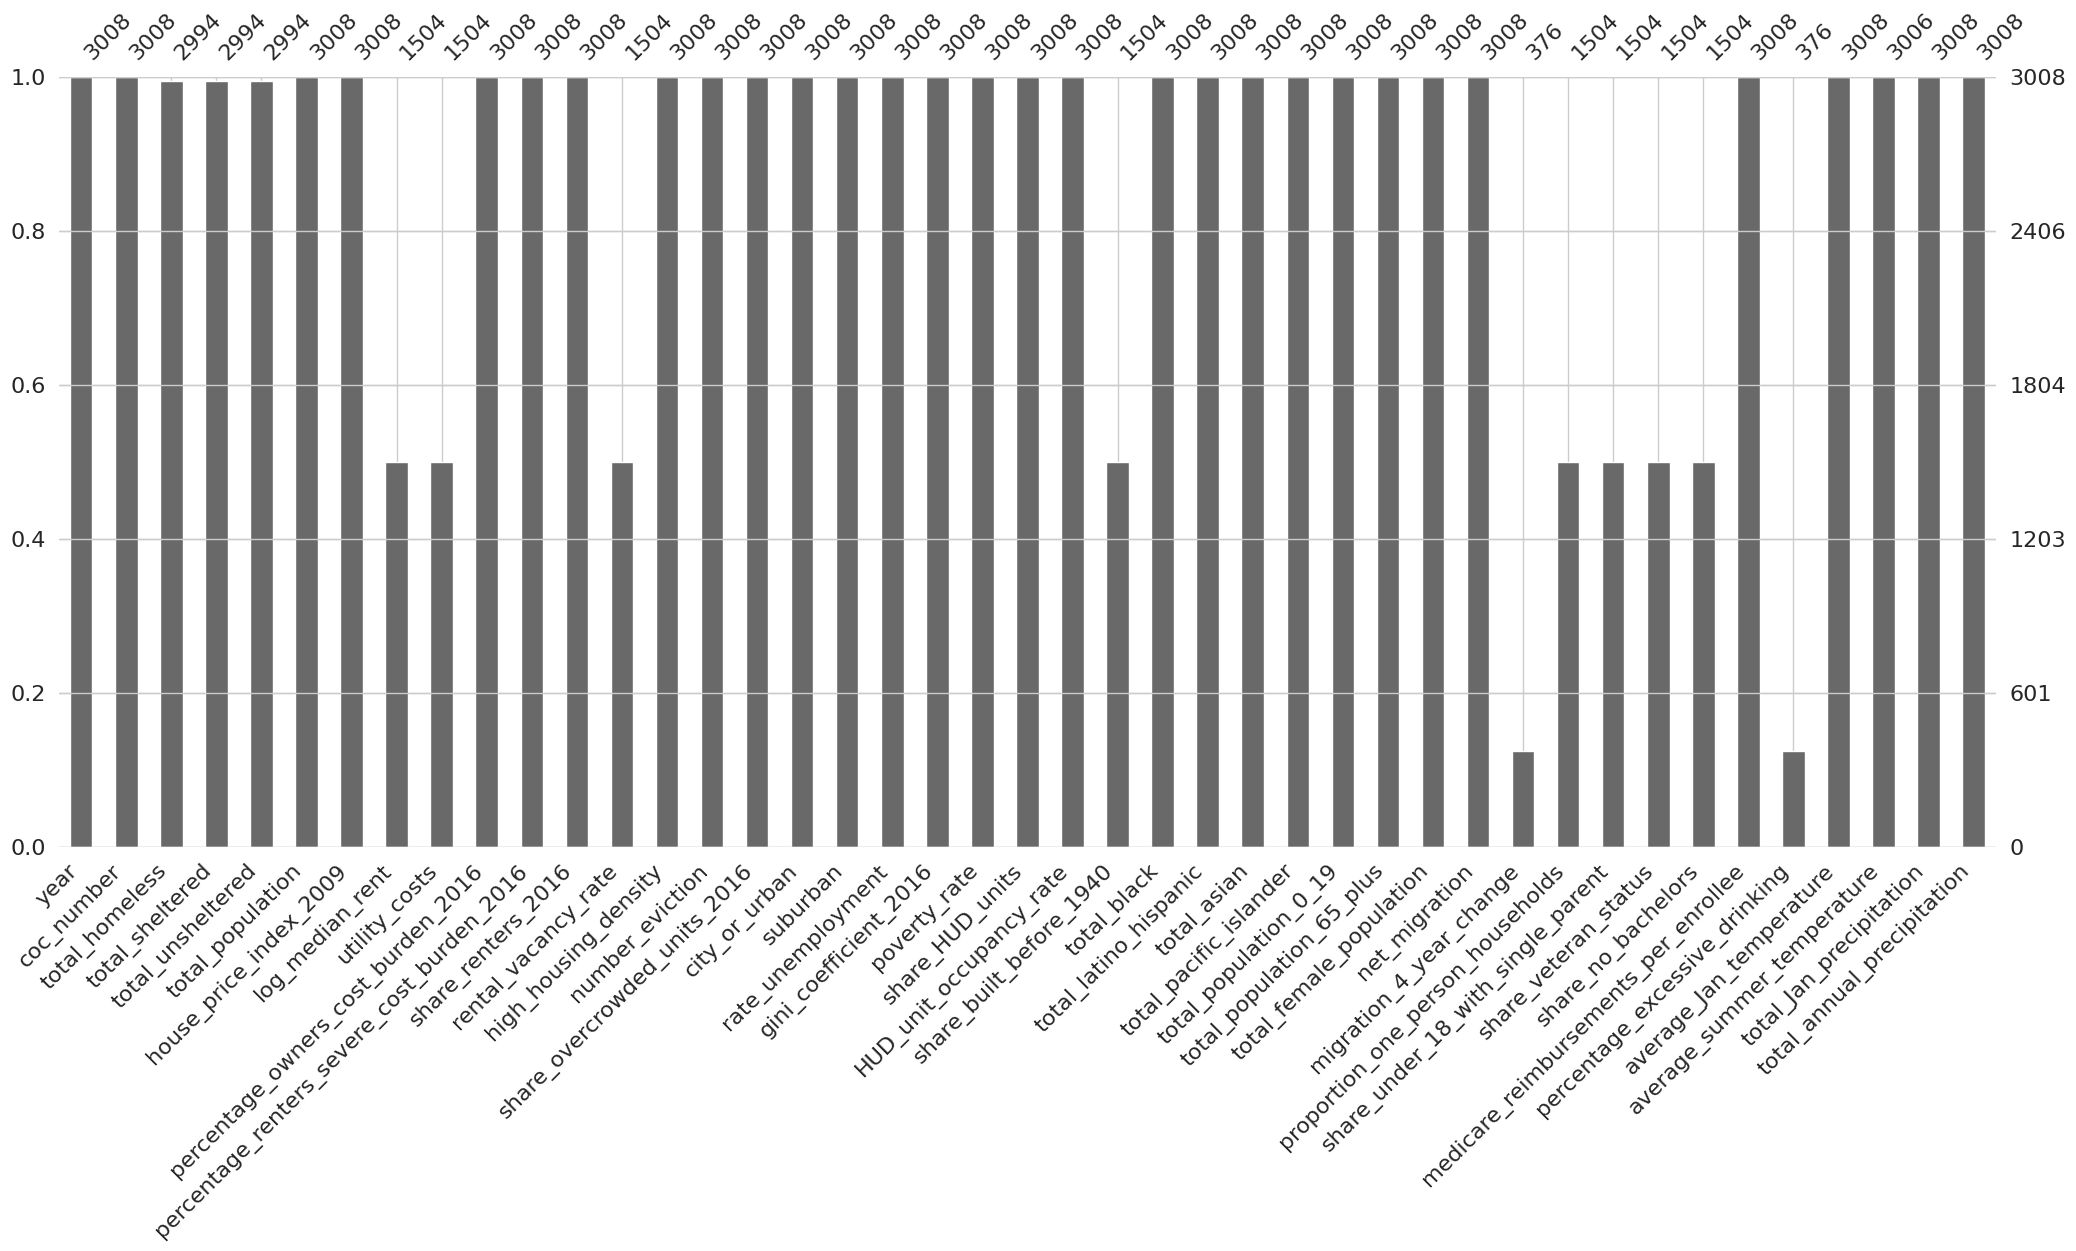

In [25]:
msno.bar(df)


It appears that there is missing or insufficient data available. The collection of data has been inconsistent, as certain years have not been included in the dataset. 

In [33]:
#remove the rows where total_homeless is missing, keep 2017
df = df[df['year'] == 2017].dropna(subset=['total_homeless'])
df

,year,coc_number,total_homeless,total_sheltered,total_unsheltered,total_population,house_price_index_2009,log_median_rent,utility_costs,percentage_owners_cost_burden_2016,...,proportion_one_person_households,share_under_18_with_single_parent,share_veteran_status,share_no_bachelors,medicare_reimbursements_per_enrollee,percentage_excessive_drinking,average_Jan_temperature,average_summer_temperature,total_Jan_precipitation,total_annual_precipitation
7,2017,AK-500,1128.0,973.0,155.0,297376,11.743647,2.438863,8.500000,15.334315,...,25.046440,23.379078,14.535126,65.634148,8.751520,0.193317,13.800000,60.799999,1.710000,16.500000
15,2017,AK-501,717.0,578.0,139.0,444146,9.042710,2.249699,14.607715,13.311670,...,25.689878,19.786558,14.142518,75.560379,9.972870,0.218806,13.800000,60.799999,1.710000,16.500000
23,2017,AL-500,1092.0,875.0,217.0,958302,-0.852477,1.862248,19.492331,12.188416,...,29.430130,32.077599,9.149558,65.983711,9.318163,0.166727,50.995346,80.874313,6.669876,38.593376
31,2017,AL-501,606.0,341.0,265.0,622361,-8.507004,1.858394,18.899839,12.539132,...,28.982967,33.668129,11.647923,74.543457,8.709522,0.165461,57.893360,81.939949,12.296666,58.519012
39,2017,AL-502,155.0,133.0,22.0,265264,0.751167,1.362010,18.803186,10.374694,...,28.329298,27.959316,9.135015,82.332657,8.967195,0.149407,48.382103,79.429985,5.462999,44.778618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,2017,WV-500,118.0,111.0,7.0,142272,8.888932,1.459895,16.585392,8.072322,...,32.257992,26.413492,11.331009,77.122894,10.197977,0.128468,35.109627,73.512047,4.164744,42.280125
2983,2017,WV-501,205.0,173.0,32.0,136349,2.793695,1.595035,17.695057,9.171934,...,34.274738,29.276711,10.428111,76.023590,9.372940,0.121457,40.581108,76.372177,4.309402,43.476166
2991,2017,WV-503,319.0,270.0,49.0,274427,3.041601,1.649177,17.768978,8.460396,...,30.329165,26.634947,10.506406,75.165283,9.367138,0.129815,40.225986,75.255028,4.353291,42.982872
2999,2017,WV-508,667.0,567.0,100.0,1275589,4.995708,1.587101,16.804708,9.594313,...,28.878338,23.425161,11.278491,79.828537,9.516158,0.125816,37.575474,73.176598,4.592812,43.718338


Double check we got rid of all missing values. 

In [34]:
df.isna().sum()

year                                          0
coc_number                                    0
total_homeless                                0
total_sheltered                               0
total_unsheltered                             0
total_population                              0
house_price_index_2009                        0
log_median_rent                               0
utility_costs                                 0
percentage_owners_cost_burden_2016            0
percentage_renters_severe_cost_burden_2016    0
share_renters_2016                            0
rental_vacancy_rate                           0
high_housing_density                          0
number_eviction                               0
share_overcrowded_units_2016                  0
city_or_urban                                 0
suburban                                      0
rate_unemployment                             0
gini_coefficient_2016                         0
poverty_rate                            

## Create relevant derived variables as new columns

Here we are creating new variables `rate_homeless`, `rate_sheltered`, and `rate_unsheltered` in the data frame `df_2017` that are the counts per 10,000 people in the population.


We should note that the demographic variables (race, gender, age) are given as total counts. We will also convert these totals to percentages.

Converting totals => rates per 10,000(%) 

In [35]:
df['rate_homeless'] = df['total_homeless'] / (df['total_population'] / 10_000)
df['rate_sheltered'] = df['total_sheltered'] / (df['total_population'] / 10_000)
df['rate_unsheltered'] = df['total_unsheltered'] / (df['total_population'] / 10_000)

In [37]:
# demographic rates per 10,000 people
df['percent_black'] = df['total_black'] / df['total_population']
df['percent_latino_hispanic'] = df['total_latino_hispanic'] / df['total_population']
df['percent_asian'] = df['total_asian'] / df['total_population']
df['percent_pacific_islander'] = df['total_pacific_islander'] / df['total_population']
df['percent_population_0_19'] = df['total_population_0_19'] / df['total_population']
df['percent_population_65_plus'] = df['total_population_65_plus'] / df['total_population']
df['percent_female_population'] = df['total_female_population'] / df['total_population']

In [38]:
df.head()

,year,coc_number,total_homeless,total_sheltered,total_unsheltered,total_population,house_price_index_2009,log_median_rent,utility_costs,percentage_owners_cost_burden_2016,...,rate_homeless,rate_sheltered,rate_unsheltered,percent_black,percent_latino_hispanic,percent_asian,percent_pacific_islander,percent_population_0_19,percent_population_65_plus,percent_female_population
7,2017,AK-500,1128.0,973.0,155.0,297376,11.743647,2.438863,8.500000,15.334315,...,37.931777,32.719520,5.212257,0.053811,0.089967,0.093952,0.024387,0.269161,0.099140,0.489629
15,2017,AK-501,717.0,578.0,139.0,444146,9.042710,2.249699,14.607715,13.311670,...,16.143340,13.013739,3.129602,0.019530,0.055727,0.040104,0.004593,0.278562,0.109905,0.467752
23,2017,AL-500,1092.0,875.0,217.0,958302,-0.852477,1.862248,19.492331,12.188416,...,11.395155,9.130733,2.264422,0.331147,0.040843,0.016632,0.000311,0.256410,0.149058,0.521677
31,2017,AL-501,606.0,341.0,265.0,622361,-8.507004,1.858394,18.899839,12.539132,...,9.737114,5.479135,4.257979,0.266807,0.033816,0.016889,0.000382,0.254735,0.167126,0.519669
39,2017,AL-502,155.0,133.0,22.0,265264,0.751167,1.362010,18.803186,10.374694,...,5.843235,5.013873,0.829362,0.090348,0.042056,0.004901,0.000471,0.236545,0.190708,0.513937


In [39]:
df.shape

(374, 53)

## Export the clean .csv files

Exporting clean dataset:

In [40]:
from google.colab import files

df.to_csv('clean_homelessness.csv', encoding = 'utf-8-sig', index=False) 

files.download('clean_homelessness.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>